In [1]:
%matplotlib inline
import my_utils as mu
import torch
import torch.nn as nn
from torch.utils import data

# The Task

* Our **Task** for this week is to apply Linear Regression to Sequential Data; in particular to time series. The model that we will develop is a simple *Auto-Regressive* Model which is an widely-used family of models in Machine Learning. 
* The Learning Outcome: Hands-on application of PyTorch's API for solving Linear Regression.


# Data Generation

* We generate our sequence data by using a function $x = f(t)$ for time steps $1, 2, \ldots, 1000$.
* We define the function $f(.)$ as follows:

In [2]:
def f(time):
    return torch.sin(0.1 * time) * torch.exp(-0.001*time) #+ torch.normal(0, 0.2, (T,))

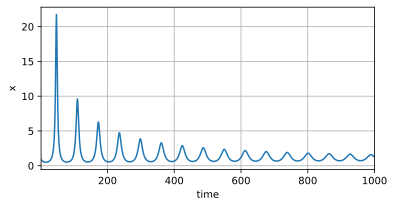

In [3]:
T = 1000  # Generate a total of 1000 points
time = torch.arange(1, T + 1, dtype=torch.float32)
x = f(time)

x = 1.0/(1.0+x)
mu.plot(time, [x], 'time', 'x', xlim=[1, 1000], figsize=(6, 3))

## Question
* Do you expect that a linear model can approximately well the above function?

## Task 1
* Your first task is to turn the above sequence into features and labels that we can train our model on.
* You should create your dataset as follows: for every time instance $t$, the target (i.e. ground truth label) will be $y_t = x_t$ and the input features $\mathbf{x}_t = [x_{t-\tau}, \ldots, x_{t-1}]$. 
    * Choose $\tau=4$ and start from $t=\tau+1$. So the first (input features, target) pair should be $([x_0, x_1, x_2, x_3], x_4)$, the second $([x_1, x_2, x_3, x_4], x_5)$ and so on.
* Store the features in a matrix (using a tensor from `torch`) called `features` so that the first row contains the first input feature, the second row the second input feature and so on. For example `features[0, :]= x_0, x_1, x_2, x_3`.
*  Store the labels in a vector (using a tensor from `torch`) called `labels` so that the first element contains the first target, the second row the second label and so on.  


In [4]:
tau = 4
features = torch.zeros((T - tau, tau))
for i in range(tau):
    features[:, i] = x[i: T - tau + i]
labels = torch.reshape(x[tau:], (-1, 1))
# labels = x[tau:]

In [5]:
print(features.size())
print(labels.size())
print(x[:7])
print(features[0:3])
print(labels[0:3])

torch.Size([996, 4])
torch.Size([996, 1])
tensor([0.9093, 0.8345, 0.7724, 0.7205, 0.6770, 0.6405, 0.6099])
tensor([[0.9093, 0.8345, 0.7724, 0.7205],
        [0.8345, 0.7724, 0.7205, 0.6770],
        [0.7724, 0.7205, 0.6770, 0.6405]])
tensor([[0.6770],
        [0.6405],
        [0.6099]])


# Task 2
* Use `data.TensorDataset` and the previously created matrices to create your dataset. Simply call it `dataset`. 
    * Use the first 600 feature-label pairs for training.
    * Check lecture slides and `torch` documentation if necessary.
* Use `data.DataLoader` to create your dataloader. Pick a reasonable value for the batch size (e.g. `batch_size=16`).
    * You can call your dataloader `data_iter`

In [6]:
n_train = 600
dataset = data.TensorDataset(features[:n_train], labels[:n_train]) #TensorDataset object
print(dataset[0]) #First example in our dataset
batch_size = 16
data_iter =  data.DataLoader(dataset, batch_size, shuffle=True) #DataLoader object

(tensor([0.9093, 0.8345, 0.7724, 0.7205]), tensor([0.6770]))


# Task 3
* This task is about creating, initializing and training a linear net, using `torch` functions. You have to implement the following 4 steps: 
    1. Create a simple linear net and initialize it appropriately.
    1. Use an MSE loss.
    1. From `torch.optim` use Adam (rather than SGD) to create an `optimizer` with a learning rate equal to 0.01.
    1. Write a training function with the following signature `train(net, data_iter, loss, optimizer, epochs, lr)` and use it to train your network`

In [7]:
num_of_inp, num_of_out = 4, 1 # input, output feature dimension
net1 = nn.Linear(num_of_inp, num_of_out)
net1.weight.data.normal_(0, 0.01); # each weight sampled from a Gaussian with mean 0 and std 0.01.
net1.bias.data.fill_(0);

In [8]:
loss = nn.MSELoss()
lr = 0.01
optimizer = torch.optim.Adam(net1.parameters(), lr)

In [9]:
def train(net, train_iter, loss, optimizer, epochs):
    for epoch in range(epochs):
        for X, y in train_iter:
            optimizer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            optimizer.step()
        print(f'epoch {epoch + 1}, '
              f'loss: {mu.evaluate_loss(net, train_iter, loss):f}')

In [10]:
train(net1, data_iter, loss, optimizer, 200)

epoch 1, loss: 1.057122
epoch 2, loss: 0.942806
epoch 3, loss: 0.774006
epoch 4, loss: 0.661852
epoch 5, loss: 0.554642
epoch 6, loss: 0.482024
epoch 7, loss: 0.396843
epoch 8, loss: 0.371367
epoch 9, loss: 0.300290
epoch 10, loss: 0.276057
epoch 11, loss: 0.251820
epoch 12, loss: 0.225286
epoch 13, loss: 0.207746
epoch 14, loss: 0.198057
epoch 15, loss: 0.189091
epoch 16, loss: 0.186944
epoch 17, loss: 0.179091
epoch 18, loss: 0.175414
epoch 19, loss: 0.186763
epoch 20, loss: 0.171454
epoch 21, loss: 0.172846
epoch 22, loss: 0.181679
epoch 23, loss: 0.166409
epoch 24, loss: 0.181421
epoch 25, loss: 0.159331
epoch 26, loss: 0.164451
epoch 27, loss: 0.232716
epoch 28, loss: 0.162281
epoch 29, loss: 0.157913
epoch 30, loss: 0.171804
epoch 31, loss: 0.176048
epoch 32, loss: 0.165271
epoch 33, loss: 0.147875
epoch 34, loss: 0.157713
epoch 35, loss: 0.137007
epoch 36, loss: 0.173057
epoch 37, loss: 0.160233
epoch 38, loss: 0.131762
epoch 39, loss: 0.190326
epoch 40, loss: 0.159752
epoch 41,

## Task 4 

* Use the model to *predict* what happens in the next time step. 
    * This is called *one-step-ahead prediction*.
    * Store the ouput of your model in variable called `onestep_preds` and use the following code to plot the original data and the model's prediction.
    * What do you oberve? Can the model predict the output samples correctly? Can you explain why?

In [11]:
onestep_preds = net1(features)

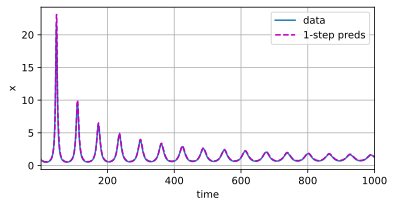

In [12]:
mu.plot([time, time[tau:]], [mu.numpy(x), mu.numpy(onestep_preds)], 'time',
         'x', legend=['data', '1-step preds'], xlim=[1, 1000],
         figsize=(6, 3))

## Task 5
* Modify the above code to plot the absolute error between tha data and the model's prediction

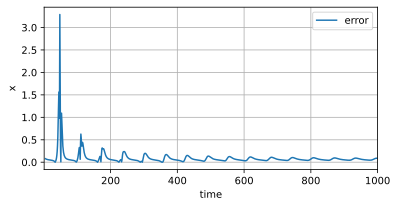

In [13]:
mu.plot(time[tau:], mu.numpy((x[tau:]-onestep_preds.squeeze(1)).abs()) , 'time',
        'x', legend=['error'], xlim=[1, 1000],
         figsize=(6, 3))

## Task 6

* Change the generating function to $x = \frac{1.0}{1.0 + f(t)}$ and repeat the above mentioned steps.
* What do you observe? 


## Task 7

* Re-run your code with the original generating function to $x = f(t)$. Then repeat Task 7 with $x = \frac{1.0}{1.0 + f(t)}$.
* It turns out that our previous predictions were too good to be true. The reason for this is that after we train the model using the first let's say 600 samples we cannot expect to have the inputs for all one-step-ahead predictions beyond this point.

* Instead, we need to work our way forward one step at a time:

$$
\hat{x}_{605} = f(x_{601}, x_{602}, x_{603}, x_{604}), \\
\hat{x}_{606} = f(x_{602}, x_{603}, x_{604}, \hat{x}_{605}), \\
\hat{x}_{607} = f(x_{603}, x_{604}, \hat{x}_{605}, \hat{x}_{606}),\\
\hat{x}_{608} = f(x_{604}, \hat{x}_{605}, \hat{x}_{606}, \hat{x}_{607}),\\
\hat{x}_{609} = f(\hat{x}_{605}, \hat{x}_{606}, \hat{x}_{607}, \hat{x}_{608}),\\
\ldots
$$

* In other words, we will have to use our own predictions to make multistep-ahead predictions.
* You are tasked to write some code to do this. Store the model's prediction in variable called `multistep_preds`.

In [14]:
multistep_preds = torch.zeros(T)
multistep_preds[: n_train + tau] = x[: n_train + tau]
for i in range(n_train + tau, T):
    multistep_preds[i] = mu.reshape(net1(multistep_preds[i - tau: i].reshape(1, -1)), 1)

In [15]:
print(multistep_preds.size())

torch.Size([1000])


## Task 8
* Modify the plotting code above to plot the original data, the one step predictions from Task 4 (`onestep_preds`) along with the multistep-ahead predictions from Task 7.
* What do you observe? Do have some explanation for what happens?

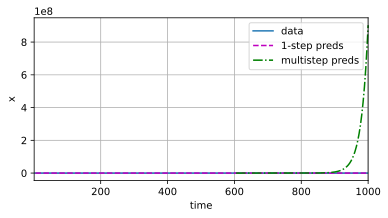

In [16]:
mu.plot([time, time[tau:], time[n_train + tau:]],
         [mu.numpy(x), mu.numpy(onestep_preds),
          mu.numpy(multistep_preds[n_train + tau:])], 'time',
         'x', legend=['data', '1-step preds', 'multistep preds'],
         xlim=[1, 1000], figsize=(6, 3))